# **2. Importing Required Libraries**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
insurance = pd.read_csv('insurance.csv')
df = insurance.copy()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [67]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# **3. Perform An Exploratory Data Analysis**

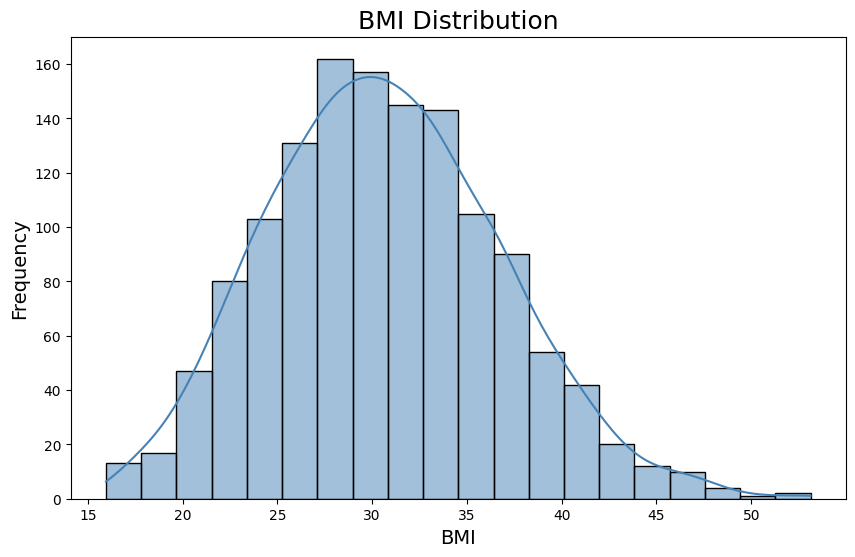

In [70]:
# the distribution of Bmi (Body Mass Index)

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="bmi", bins=20, kde=True, color='steelblue')
plt.xlabel('BMI', size=14)
plt.ylabel('Frequency', size=14)
plt.title('BMI Distribution', size=18)
plt.show();

BMI dağılımı incelendi.
BMI dağılımı çan eğrisi şeklindedir.
BMI değerleri büyük oranda normal aralıktadır.

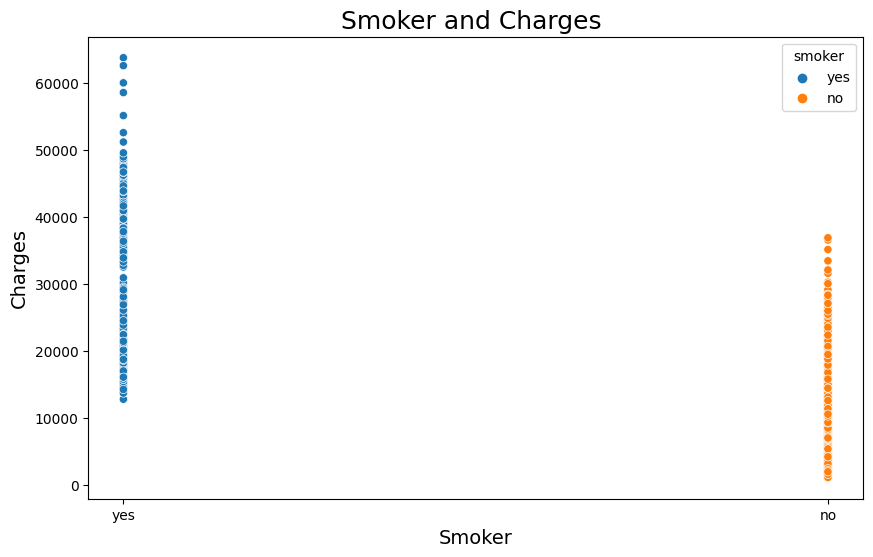

In [71]:
# the relationship between “smoker” and “charges”
plt.figure(figsize=(10,6))
sns.scatterplot(x='smoker', y='charges', data=df, hue='smoker')
plt.xlabel('Smoker', size=14)
plt.ylabel('Charges', size=14)
plt.title('Smoker and Charges ', size=18)
plt.show();


Sigara içenlerin masrafları daha yüksek çıktı.
Sigara içmeyenlere göre daha geniş bir dağılım söz konusudur.

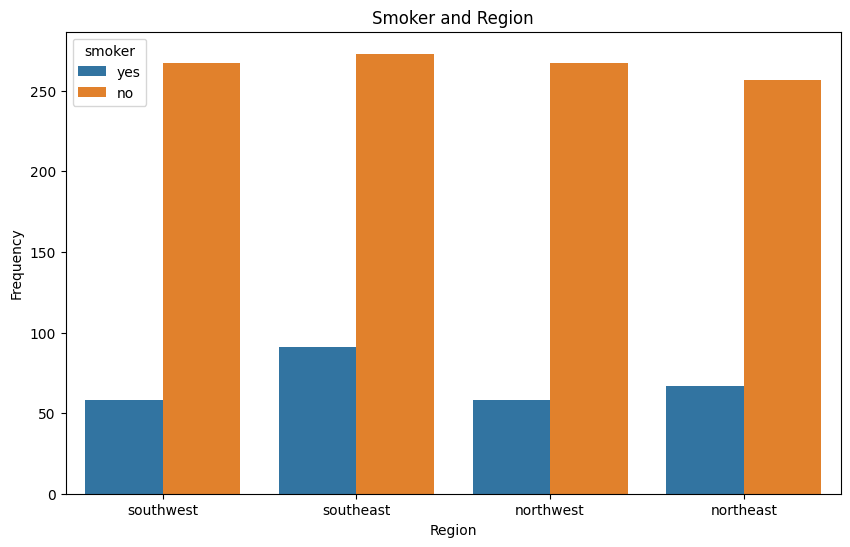

In [72]:
# the relationship between “smoker” and “region”
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='region', hue='smoker')
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Smoker and Region')
plt.show();

Southeast bölgesinde sigara içen sayısı diğer bölgelere göre daha fazla. Sigara içmeyenlerin sayısı, sigara içenlerden daha fazladır.


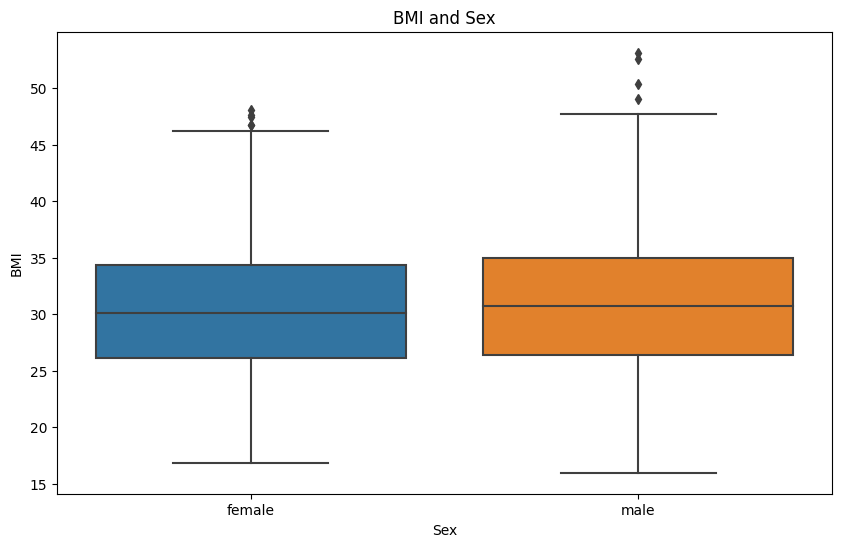

In [73]:
# the relationship between “bmi” and “sex
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sex', y='bmi')
plt.xlabel('Sex')
plt.ylabel('BMI')
plt.title('BMI and Sex')
plt.show()

Erkeklerin BMI değerleri kadınlara göre daha yüksek çıkmaktadır.  Her iki cinsiyette de yüksek varyasyon gözlenmektedir.

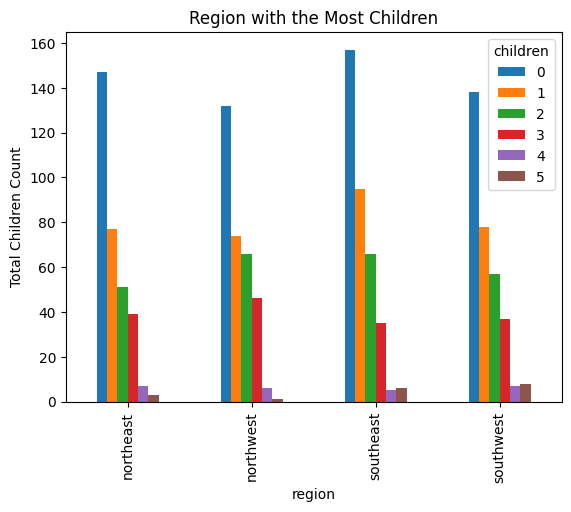

In [74]:
# region with the most children
reg_child=df.groupby(['region','children']).size()
df2=reg_child.unstack()
df2.plot(kind='bar')
plt.ylabel('Total Children Count')
plt.title('Region with the Most Children')
plt.show()

Southeast bölgesi en yüksek çocuk sayısına sahip

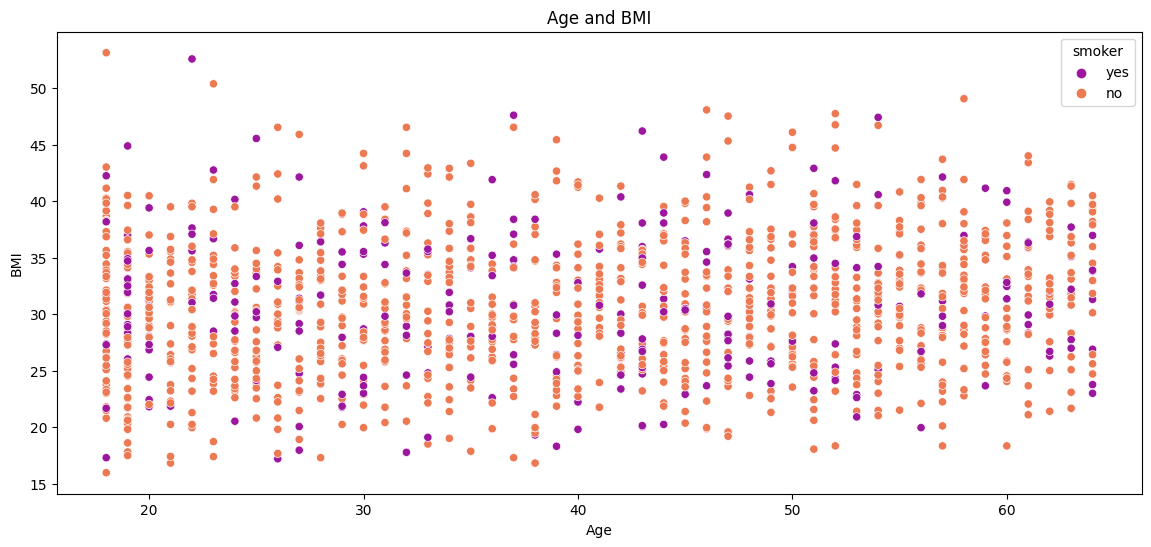

In [75]:
# the relationship between “age” and “bmi”
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='age', y='bmi', hue='smoker', palette='plasma')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age and BMI')
plt.show()

Yaş ilerledikçe BMI artma eğilimi göstermektedir. Ancak dağılımda büyük varyasyonlar bulunmaktadır.

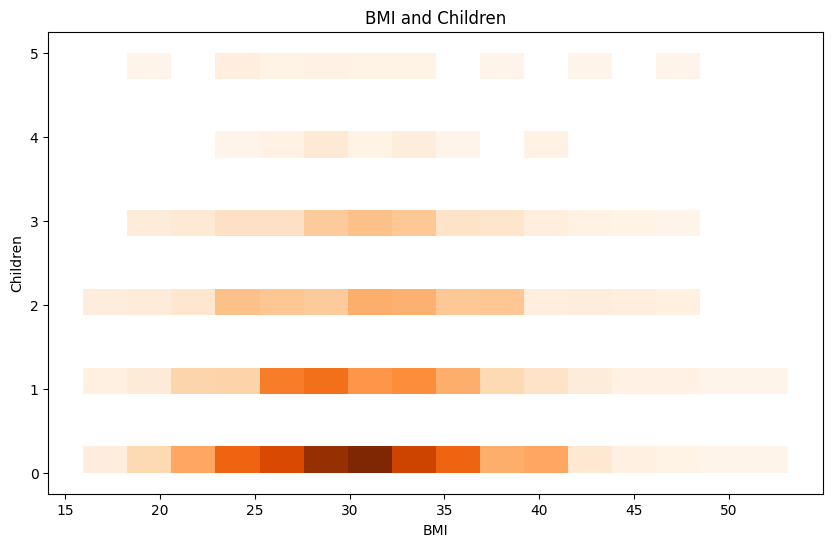

In [80]:
# the relationship between “bmi” and “children
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="bmi", y="children", bins=16, cmap='Oranges')
plt.xlabel("BMI")
plt.ylabel("Children")
plt.title("BMI and Children")
plt.show()


Çocuksuz bireylerde de yüksek BMI görülmektedir.

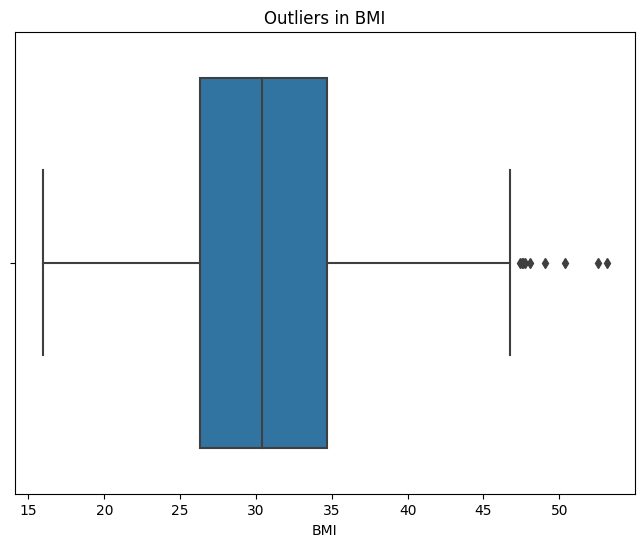

In [77]:
# outlier in the "bmi" variable
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="bmi")
plt.xlabel("BMI")
plt.title("Outliers in BMI")
plt.show()

Dağılımın sağ kuyruk kısmında küçük bir aykırılır var


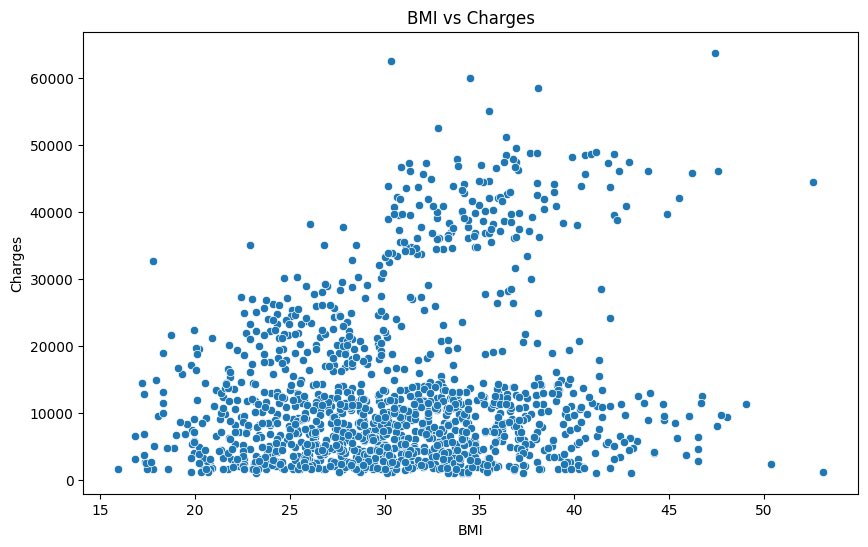

In [78]:
# the relationship between “bmi” and “charges”
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="bmi", y="charges")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.show()

BMI arttıkça ücretlerde de genel olarak artış gözlenmektedir.
Ancak dağılımın yoğunluğu orta BMI değerlerinde daha fazladır

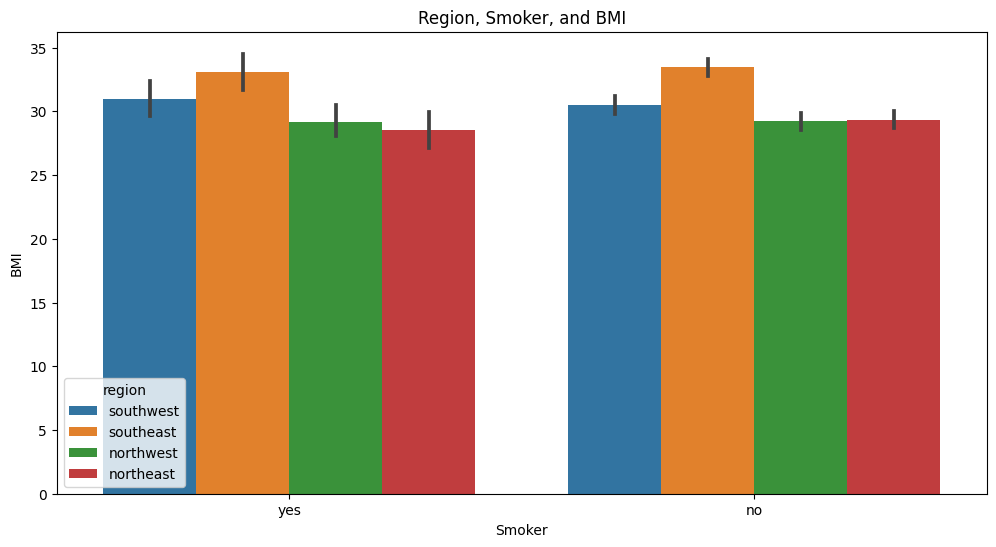

In [79]:
# the relationship between “region”, “smoker” and “bmi”
plt.figure(figsize=(12,6))
sns.barplot(data=df, x="smoker",y="bmi",hue="region")
plt.xlabel("Smoker")
plt.ylabel("BMI")
plt.title("Region, Smoker, and BMI")
plt.show()

Bazı bölgelerde sigara içenlerin BMI'si belirgin şekilde daha yüksek çıkmaktadır. Özellikle Southeast bölgesinde hem sigara içme oranı hem de BMI oldukça yüksek. North bölgelerinde ise smoker-BMI ilişkisi zayıf.

# **4. Data Preprocessing**


In [30]:
# Prepare features and target variable
X = df.drop(columns=['charges'])
y = df['charges']

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Perform Label Encoding for categorical variables
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


In [61]:
# Perform One-Hot Encoding for the 'region' column
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
region_encoded = onehot_encoder.fit_transform(df[['region']])
region_encoded_df = pd.DataFrame(region_encoded, columns=['region_1', 'region_2', 'region_3'])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [45]:
X_region = df[['region']]
encoder = OneHotEncoder()
encoded_regions = encoder.fit_transform(X_region)
df_regions = pd.DataFrame(encoded_regions.toarray(), columns=(['region_0', 'region_1', 'region_2', 'region_3']))
X_new = pd.concat([df_regions, X], axis=1)


In [46]:
from sklearn.model_selection import train_test_split

X = pd.concat([X, region_encoded_df], axis=1)
X = X.drop(columns=['region'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# using StandardScaler for normalization and scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **5. Model Selection**


In [50]:
# LinearRegression
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()

# SVR
from sklearn.svm import SVR
svr_model = SVR()

# DecisionTree
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()

# RandomForest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()


In [51]:
# cross_val_score
from sklearn.model_selection import cross_val_score

linear_scores = cross_val_score(linear_regression_model, X_train, y_train, cv=5)
svr_scores = cross_val_score(svr_model, X_train, y_train, cv=5)
decision_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)


In [52]:
# average scores
print("Linear Regression: %f" %linear_scores.mean())
print("SVR: %f" %svr_scores.mean())
print("Decision Tree Regressor: %f" %decision_scores.mean())
print("Random Forest Regressor: %f" %rf_scores.mean())

Linear Regression: 0.733110
SVR: -0.101493
Decision Tree Regressor: 0.691454
Random Forest Regressor: 0.822983




*   Sonuçlara göre en yüksek ortalama skora sahip model RandomForestRegressor modeli. Dolayısıyla bu veri seti için en uygun model.
*   SVR'ın negatif skoru modelden ziyade ayarlanması gereken hyper-meter'lar olduğunun göstergesi.
*   Decision Tree, Random Forest Regressor kadar etkili sonuç vermedi.



In [84]:
best_model = rf_model

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region_1  1338 non-null   float64
 6   region_2  1338 non-null   float64
 7   region_3  1338 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 83.8 KB


In [86]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1338 entries, 0 to 1337
Series name: charges
Non-Null Count  Dtype  
--------------  -----  
1338 non-null   float64
dtypes: float64(1)
memory usage: 10.6 KB


# **6. Hyper-parameter Optimization**

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

#  farklı hiperparametreler
params = {'n_estimators': [100, 200, 500],
          'max_depth': [5, 8, 15],
          'min_samples_split': [2, 5, 10]}



# GridSearch
grid_search = GridSearchCV(rf_model, param_grid=params, cv=5)

# modeli veri ile uydurma
grid_search.fit(X_train, y_train)

# en iyi parametre kombinasyonu
best_params = grid_search.best_params_

# en iyi skora sahip model
best_model = grid_search.best_estimator_

print("Best parameters: ", best_params)
print("Best model: ", best_model)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best model:  RandomForestRegressor(max_depth=5, min_samples_split=5, n_estimators=200)
Best score:  0.8449378897915061


# **7. Model Evaluation**

In [88]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 score:", r2)
print("MSE:", mse)
print("MAE: ", mae)

R2 score: 0.8743037232952108
MSE: 19514187.51165748
MAE:  2551.3747047163265
